# Lorenz Equations

A demonstration of reproducible research.

In [1]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames


In [2]:
%matplotlib inline

## Background

In the early 1960s, [Edward Lorenz](https://en.wikipedia.org/wiki/Edward_Norton_Lorenz), a mathemtaician and meteorologist was studying convection.  Considering a 2-dimensional flow of fluid of uniform depth with an imposed vertical temperature difference.

![convection](convection.png)


Simplifying a more general set of equations for convection, Lorenz derived:

$$
\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}
$$

Where 

* x is proportional to the itensity of convective motion
* y is proportional to the temperature difference of ascending and descending currents
* z is proportional to the distortion of thr vertical temperature profile
* $\sigma$ is the [Prandtl Number](https://en.wikipedia.org/wiki/Prandtl_number): the ratio of momentum diffusivity (Kinematic viscosity) and thermal diffusivity.
* $\rho$ is the [Rayleigh Number](https://en.wikipedia.org/wiki/Rayleigh_number): ratio of buoyancy and viscosity forces multiplied by the ratio of momentum and thermal diffusivities.
* $\beta$ is a geometric factor.

For more information on the physical meanings, see [this answer](http://physics.stackexchange.com/questions/89880/physical-interpretation-of-the-lorenz-system).  A typical value of the three parameters is $\sigma=10, \beta=8/3, \rho=28$


## Define the equations

In [3]:
def dx(x,y, sigma):
    return sigma*(y-x)

In [4]:
def dy(x, y, z, rho):
    return x*(rho-z) - y

In [5]:
def dz(x, y, z, beta):
    return x*y-beta*z

Now create a function which returns the time derivative. To be able to integrate this numerically, it must accept a time argument t0.

In [6]:
def lorenz_deriv(point, t0, sigma=10, beta=2.666, rho=28):
    """Compute the time-derivative of a Lorentz system
    
    Arguments;
        point : (x,y,z) values, tuple or list of length 3
        t0    : time value
        sigma : Prandtl number, default=10
        beta  : geometric factor, default=2.666
        rho   : Rayleigh number, default=28
        
    Returns, the derivative (dx, dy, dt) calculated at point"""
    x = point[0]
    y = point[1]
    z = point[2]
    return [dx(x, y, sigma), dy(x, y, z, rho), dz(x, y, z, beta)]

Create a series of timesteps to integrate over.

In [7]:
max_time = 100
t = np.linspace(0, max_time, int(250*max_time))

## Integrate numerically


Lorenz simulated the behaviour of these equations on an [LGP-30](https://en.wikipedia.org/wiki/LGP-30), a "desktop" machine weighing >300Kg, and taking tape input.  Since simulations took a long time, he would often print out intermediate results and restart the simulations from somewhere in the middle.  The intermediate results were truncated to 3 decimal places, which lead to his famous discovery...

First simulate the system with a low value of $\rho$, meaning conduction is favoured over convection.

In [8]:
x0 = 3.0
y0 = 15.0
z0 = 0
sigma = 10
beta = 2.666
rho = 10
epsilon = 0.001

Here we use the `scipy.integrate.odeint` function, which uses the [LSODA](http://www.oecd-nea.org/tools/abstract/detail/uscd1227) solver.

In [9]:
r1 = integrate.odeint(lorenz_deriv, (x0, y0, z0), t, args=(sigma, beta, rho)) 

And redo the simulation with slightly different initial conditions...

In [10]:
r2 = integrate.odeint(lorenz_deriv, (x0, y0+epsilon, z0), t, args=(sigma, beta, rho)) 

Plot the results, examine intensity of convection over time...

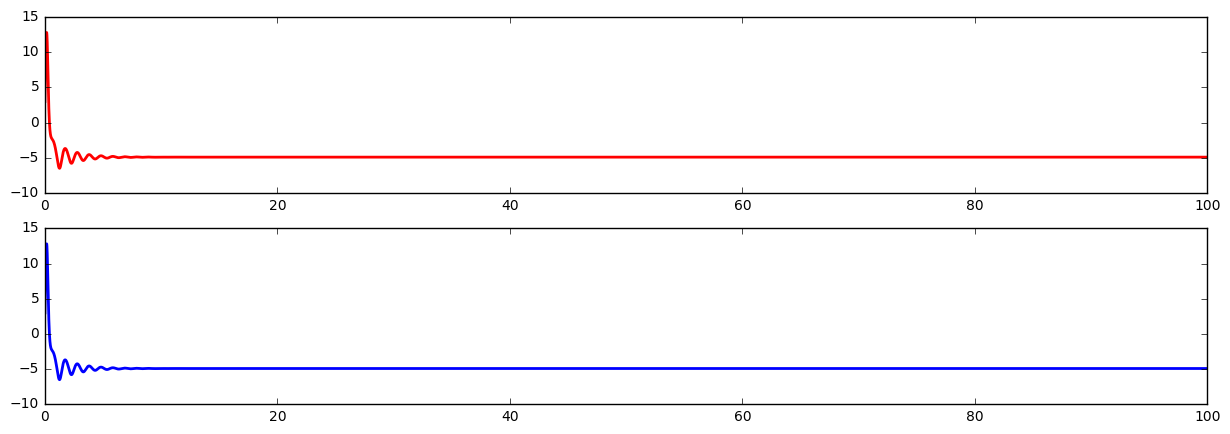

In [11]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(t, r1[:,0], 'r-', linewidth=2)
ax2.plot(t, r2[:,0], 'b-', linewidth=2)

Not so interesting. Steady state solution shows that convection doesn't occur.  In this case, making a small change to the initial conditions doesn't matter. Plot a scatter of results from the two runs.

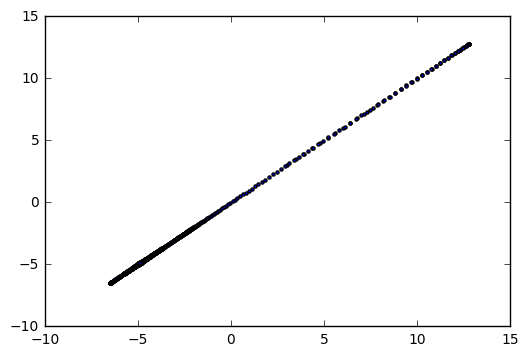

In [12]:
plt.scatter(r1[:,0], r2[:,0], marker='.')

Show how x, y, and z evolve over time

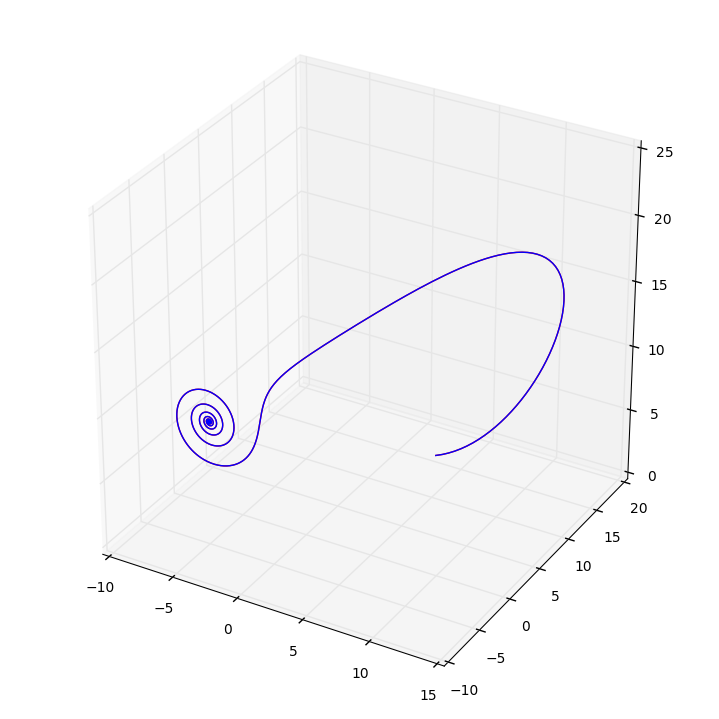

In [13]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
x, y, z = r1.T
ax.plot(x, y, z, 'r-', linewidth=1)
x, y, z = r2.T
lines = ax.plot(x, y, z, 'b-', linewidth=1)

## Exercise

**Rerun the code with a more realistic value of $\rho=28$.  **

## The Lorenz Attractor

We can explore in more detail what happens over different ranges of starting points


In [34]:
N = 5
sigma = 10
beta = 2.666
rho = 28

# generate random initial conditions uniform(-15, 15)
x0 = -15 + 30 * np.random.random((N, 3))
x0

array([[ -5.04117765, -11.17065497,  -1.36463646],
       [ 12.80126419, -12.38458801,  -2.72177287],
       [-14.99277182,   0.24928451,  -9.76713759],
       [ -5.45408094,  14.60035494,  10.50024973],
       [ 10.92013321, -13.57775883, -13.42161216]])

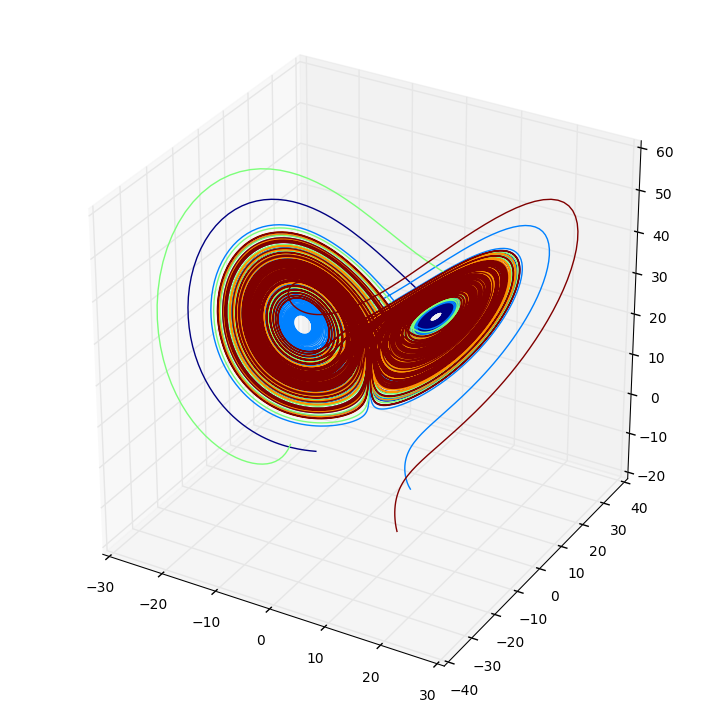

In [35]:
results = np.asarray([integrate.odeint(lorenz_deriv, x0i, t) for x0i in x0])

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N))

for i in range(N):
    x, y, z = results[i,:,:].T
    ax.plot(x, y, z, '-', c=colors[i])
    

plt.show()



## Conlcusions

The Lorenz equations behave *chaoticly*, exhibiting extreme *sensitivity to inital conditions* at certain parameter values. 

The values of x, y, and z tend toward two regions, representing two semi-stable states. Values can remain for some time in the same region, then suddenly flip into another state. 

Broad aspects of the system can be predicted, but exact details such as when convection will begin and end are impossible to predict beyond a certain timescale.  Because of the feedbacks between variables, even tiny deviations in initial conditions will grow over time.

